# Introduction

#####   This report presents an analysis of the electric vehicle (EV) market (in USA), focusing on key trends in adoption, geographical distribution, types of EVs, popular makes and models, electric range, and market growth projections. By examining these aspects, we aim to provide valuable insights into the current state and future prospects of the EV industry.

## Importing The Necessary Libraries:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##### - Handling missing values

In [17]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [18]:
# dropping missing values from the dataset
df = df.dropna()

In [19]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

- As we see now we have no missing values in our data anymore.

---

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**
     - EV Adoption Over Time.
     - Geographical Distribution of EVs.
     - Types of EVs.
     - Popular Makes and Models.
     - Electric Range.
     - Market Growth Projections.
     
     

-  **1 -** EV Adoption Over Time:
          
    -  How has the population of EVs grown year over year?

In [20]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [21]:
df_evs_adoption_year = df['Model Year'].value_counts().sort_index().to_frame()

df_evs_adoption_year.sample(5)

,count
Model Year,
1997,1
2018,14286
1998,1
2023,57519
2003,1


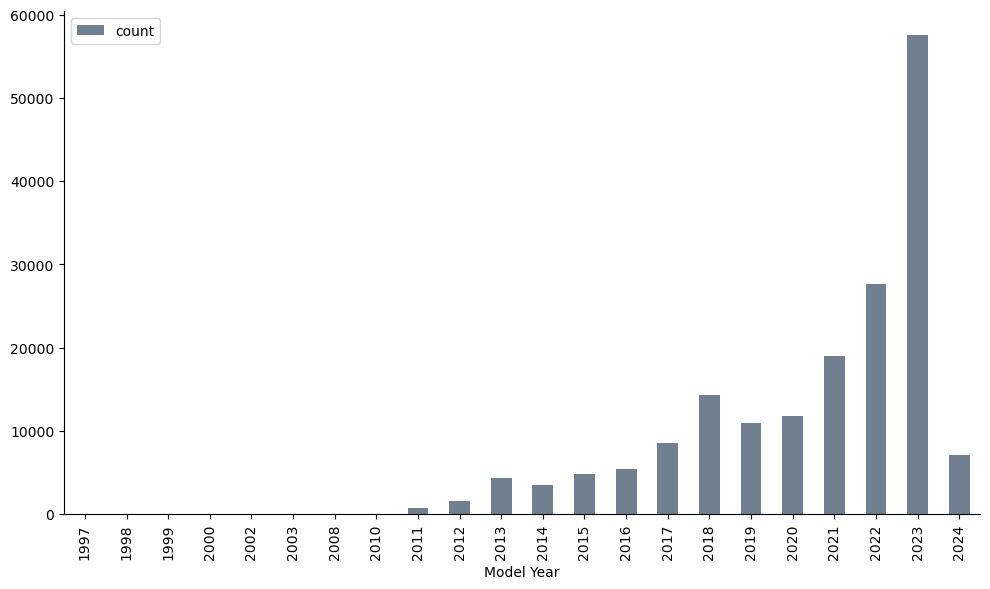

In [22]:
df_evs_adoption_year.plot(kind='bar', figsize=(10, 6), color='slategrey')

sns.despine()
plt.tight_layout()
plt.show()

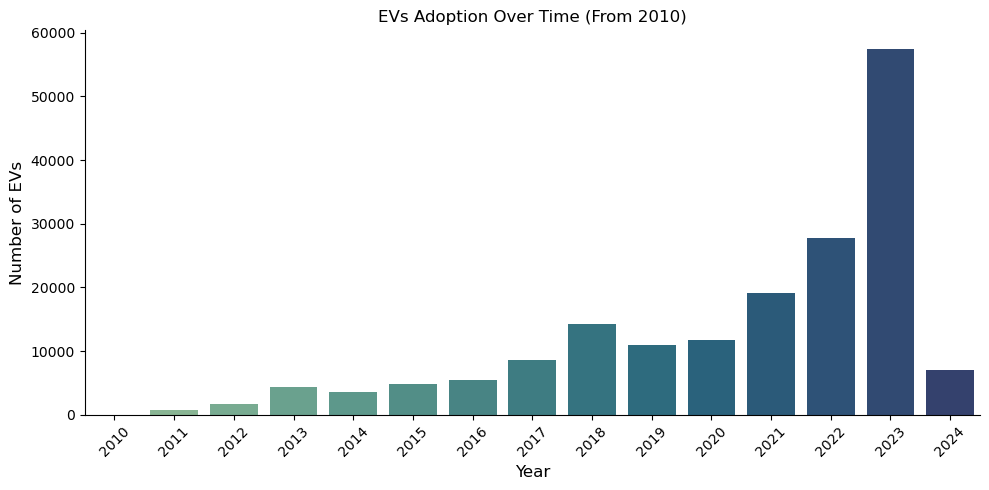

In [25]:
# fromatting the plot with seaborn
plt.figure(figsize=(10,5))
# plotting from 2010
df_plot = df_evs_adoption_year[df_evs_adoption_year.index >= 2010]
sns.barplot(x=df_plot.index, y=df_plot['count'], data=df_plot, palette='crest')


# Create a function to format y-axis values 
def format_yaxis(value, tick_number):
    return f'{int(value/1000)}K'


# Format the y-axis 
#plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))

plt.title('EVs Adoption Over Time (From 2010)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of EVs', fontsize=12)
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


- **Insights:**

   -   Steady Growth: Consistent increase in EV adoption since 2011.

   -   Spike in 2023: Significant rise in EV registrations, surpassing 50,000, possibly due to incentives, new models, or infrastructure improvements.
   
   -   Early Adoption Phase: Gradual growth from 2011 to 2015, marking the initial stages of EV market penetration.

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 